In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/colorIdentification


/content/drive/MyDrive/colorIdentification


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (4000, 6000, 3)


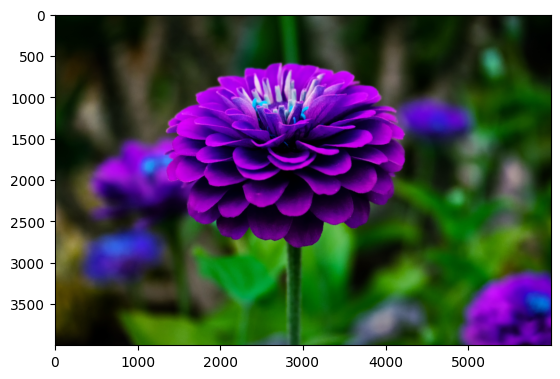

In [4]:
image = cv2.imread('/content/drive/MyDrive/colorIdentification/flower.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

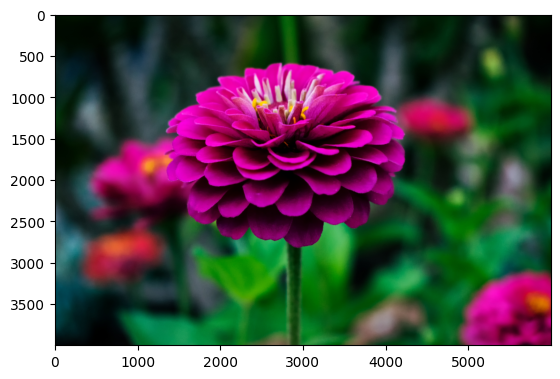

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

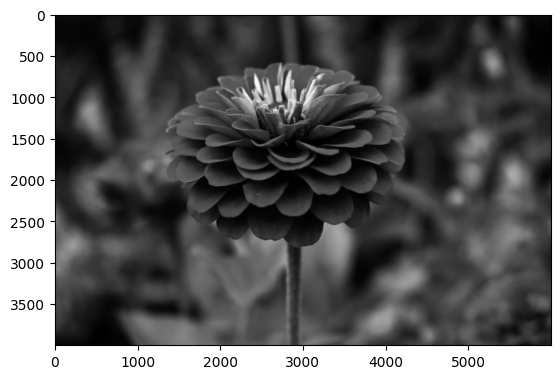

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

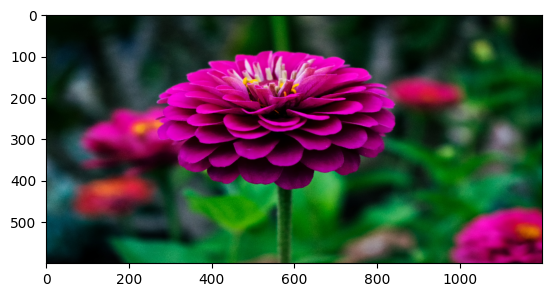

In [7]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
def get_colors(image, number_of_colors, show_chart):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([17.48824985, 63.84459525, 34.92168734]),
 array([93.99350006, 10.34614961, 47.70028644]),
 array([71.49756189, 95.84894974, 82.75225056]),
 array([ 14.78017086, 125.74390364,  38.90759713]),
 array([218.42593105,  11.46007415, 168.80980577]),
 array([207.62173547, 142.23476552, 158.46672283]),
 array([10.64316707, 20.72494021, 13.45245986]),
 array([168.69991745,  20.06821045,  92.03488726])]

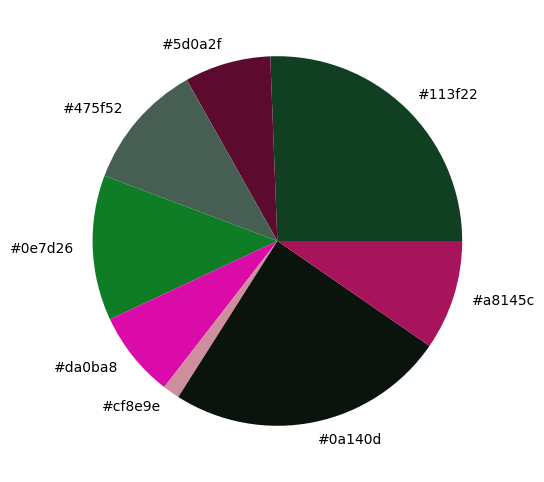

In [11]:
get_colors(get_image('/content/drive/MyDrive/colorIdentification/flower.jpg'), 8, True)